In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as ply
import plotly.graph_objs as go
import geopandas as gpd


Bad key "text.kerning_factor" on line 4 in
c:\users\rmota\.conda\envs\tcc\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# reading a csv file containing well names and UTM coordenates, using pandas:
header = ['Well_Name', 'UTM_E', 'UTM_N']
data = pd.read_csv('../data/Coordenadas_MP.csv', sep=',', names=header, header=0)
#data

In [3]:
#creating a dictionary to save the values of each columns:
coord={}
for i in range (np.shape(data)[1]):
    dicio = {header[i]: list(data[header[i]].values)}
    coord.update(dicio)

In [4]:
#shape file import
shapepath = shapepath = "../data/campo_crc/campo_crc_WGS.shp"
fields = gpd.read_file(shapepath, rows=1)

In [5]:
colors = {}
colors["code"] = ["#99ccff", "#ffff99", "#ffcc99", "#99ff99"]

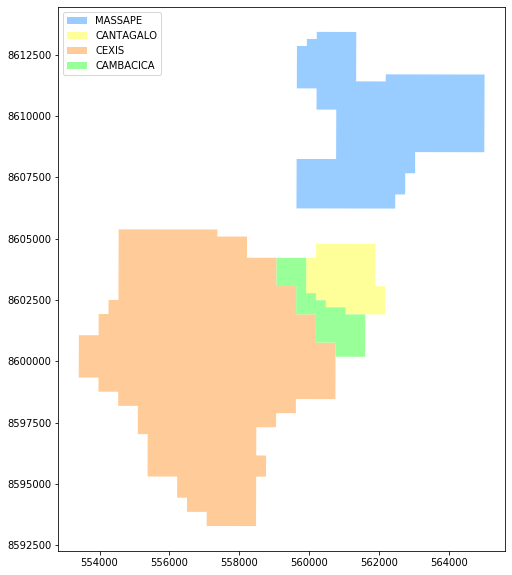

In [6]:
plt.figure(figsize=(8,10))
ax1 = plt.subplot()
for i in range(len(fields)):
    x,y = fields.geometry[i].exterior.xy
    ax1.fill(x,y, colors["code"][i], label=fields.NOM_CAMPO[i])
plt.legend()
plt.savefig("../image/fields.png", dpi=300, transparent=True)
plt.show()

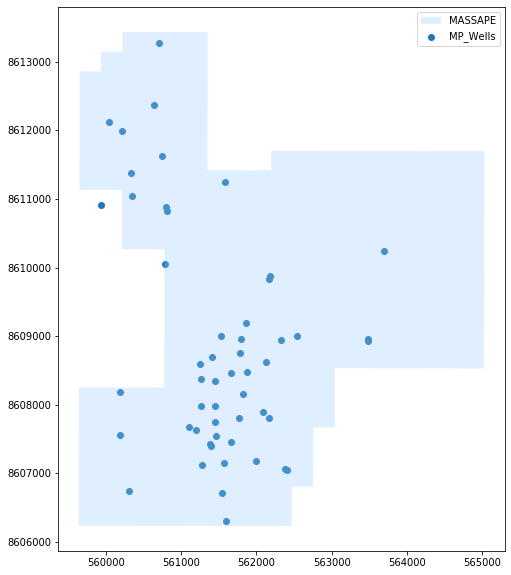

In [7]:
plt.figure(figsize=(8,10))
ax1 = plt.subplot()
x,y = fields.geometry[0].exterior.xy
ax1.fill(x,y, colors["code"][0], label=fields.NOM_CAMPO[0], alpha=0.3)
ax1.scatter(coord[header[1]], coord[header[2]], label='MP_Wells')
plt.legend()
plt.savefig("../image/mp.png", dpi=300, transparent=True)
plt.show()

In [11]:
choice = {'Well_Name': ['7-MP-28D-BA', '7-MP-56D-BA', '7-MP-53D-BA'],
 'UTM_E': [561866.85, 561790.8, 561245.33],
 'UTM_N': [8609189.13, 8608953.71, 8608588.97]}

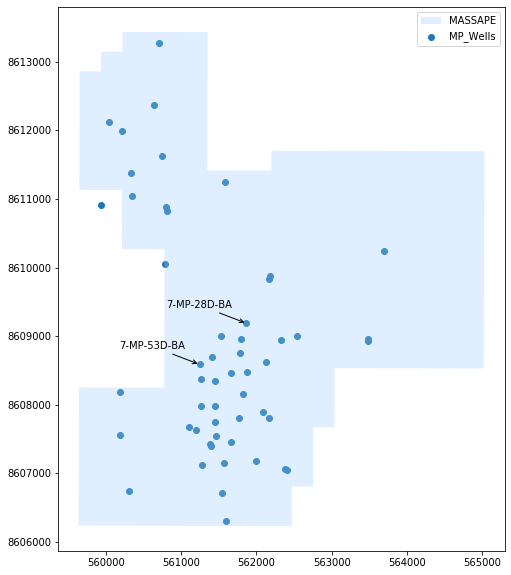

In [12]:
plt.figure(figsize=(8,10))
ax1 = plt.subplot()
x,y = fields.geometry[0].exterior.xy
ax1.fill(x,y, colors["code"][0], label=fields.NOM_CAMPO[0], alpha=0.3)
ax1.scatter(coord[header[1]], coord[header[2]], label='MP_Wells')
for i in range(len(choice[header[0]])):
    ax1.annotate(choice[header[0]][i], xy=(choice[header[1]][i],choice[header[2]][i]), xytext=[-80,15],
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle="->",facecolor='black')
                )
plt.legend()
plt.savefig("../image/mp_choice.png", dpi=300, transparent=True)
plt.show()